In [169]:
import sys
sys.path.append('/Users/edvardavagyan/Programming/autoencoders/src/')

import torch
import numpy
from models.autoencoder import AutoEncoder
from dataset.mnist_dataset import MNISTDataset
import pytorch_lightning as pl
import torchvision.transforms as transforms

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [170]:
transform = transforms.Compose([transforms.ToTensor()])

In [171]:
mnist_data = MNISTDataset('/Users/edvardavagyan/Programming/autoencoders/dataset', 512, 0.8, False, transform)

In [179]:
hparams = {
    "learning_rate": 1e-4,
    "cos_loss_weight": 1,
    "rec_loss_weight": 2,
}

In [180]:
model = AutoEncoder(hparams=hparams, input_dim=28*28)

In [181]:
print(model)

AutoEncoder(
  (cosine_loss): CosineSimilarityLoss()
  (decoder): Sequential(
    (0): Linear(in_features=32, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=784, bias=True)
  )
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
  )
)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name        | Type                 | Params
-----------------------------------------------------
0 | cosine_loss | CosineSimilarityLoss | 0     
1 | decoder     | Sequential           | 209 K 
2 | encoder     | Sequential           | 219 K 
-----------------------------------------------------
429 K     Trainable params
0         Non-trainable params
429 K     Total params
1.718     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

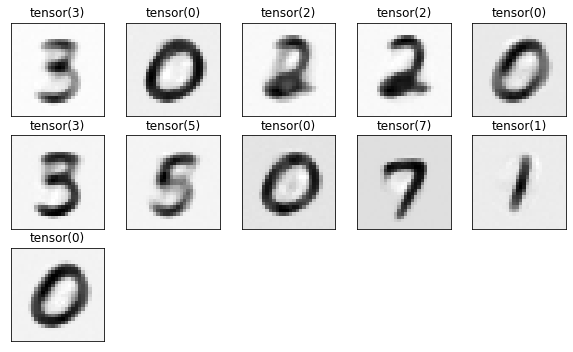

In [182]:
trainer = pl.Trainer()
trainer.fit(model, mnist_data)